### PCA降维
* 目标：提取最有价值的信息（基于方差）

* 问题：降维后数据失去原来意义（可以保密）

### 原理：
* 向量、基：基是正交的（相互垂直、线性无关）
* 基变换：空间变换

### 基变换依据：
* 协方差矩阵：寻找一个一维基，使得所有数据变换为这个基上的坐标表示后，方差值最大
* 方差： $Var(a)=\frac{1}{m}\sum_{i=1}^m (a_{i}-{\eta})^2$
* 协方差(假设均值为0):  $Cov(a,b)=\frac{1}{m}\sum_{i=1}^m (a_{i}b_{i})^2$
* 说明：协方差为0表示两个字段完全独立，表现为两个基正交

### 优化目标：
* 将一组N维向量降为K维，目标是选择K个单位正交基，使原始数据变换到这组基上后，各字段两两间协方差为0，字段的方差尽可能大
* <font color=#0099ff size=4 face="微软雅黑">协方差矩阵 </font>：对角线元素为两个字段的方差，其他元素为协方差
* 数学原理：<font color=#0099ff size=4 face="微软雅黑"> 特征值、特征向量 </font>
* 采取措施：协方差矩阵<font color=#0099ff size=4 face="微软雅黑">对角化 </font>：除对角线外，其他元素化为0，并且对角线上元素按大小从上到下排序
* 数学定理：实对称矩阵（一个n行n列的实对称矩阵一定可以找到n个单位正交特征向量）——实对称阵对角化

原数据$150\times4$——>要降维为$150\times2$，需要$[150\times4]*[4\times2]=[150\times2]$   
此处，$[4\times2]$即为协方差矩阵得到的4个特征值中，最大的两个特征值，得到的特征向量

In [35]:
import numpy as np
import pandas as pd
df = pd.read_csv('23_iris.data')
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# 查看类别值
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
# 将特征与类别分开
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

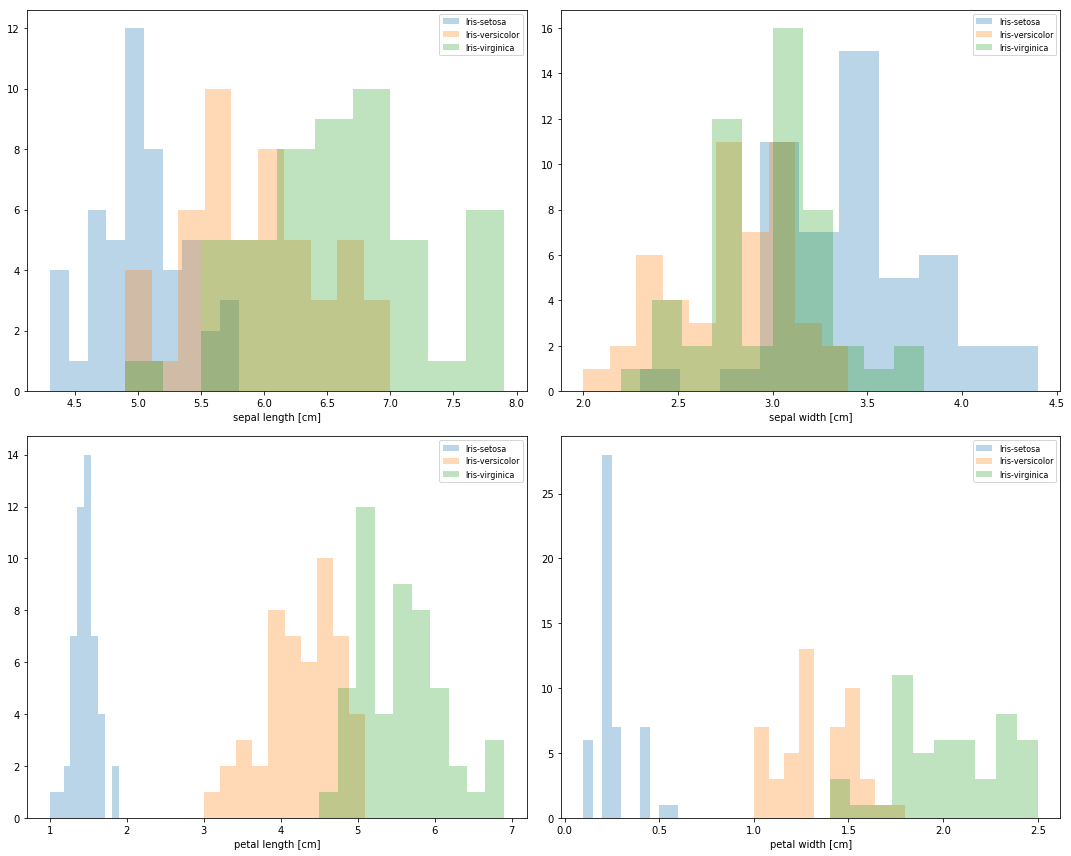

In [43]:
from matplotlib import pyplot as plt
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}


plt.figure(figsize=(15, 12))
for cnt in range(4):
    plt.subplot(2, 2, cnt+1)
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
        plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
    plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

### 特征标准化处理

In [46]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print (X_std[:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


### np.mean求均值：
    axis = 0 ：压缩行，对各列求均值
    axis = 1 ：压缩列，对各行求均值

In [47]:
mean_vec = np.mean(X_std, axis=0)
mean_vec

array([ -4.73695157e-16,  -6.63173220e-16,   3.31586610e-16,
        -2.84217094e-16])

### 协方差矩阵（自己计算）

In [55]:
#(X_std - mean_vec).T.shape=(4, 150)
#(X_std - mean_vec).T.dot((X_std - mean_vec)).shape=(4, 4)
#X_std.shape[0]=150
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### 协方差矩阵（或调用numpy.cov）

In [58]:
cov_mat = np.cov(X_std.T)
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### numpy.linalg.eig计算特征值与特征向量

In [60]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### 特征值由大到小排，选择其中最大的2个，然后将对应的2个特征向量分别作为列向量组成<font color=green size=5> 特征向量矩阵 </font>

In [61]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)
print ('----------')
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[(2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.92740362151734268, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163983, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.020746013995595849, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]
----------
Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


### 特征值占比例大小，注意np.cumsum用法

In [62]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print (var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.770452093801325, 23.030523267680657, 3.6838319576273864, 0.51519268089062986]


array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

    画图直观展示

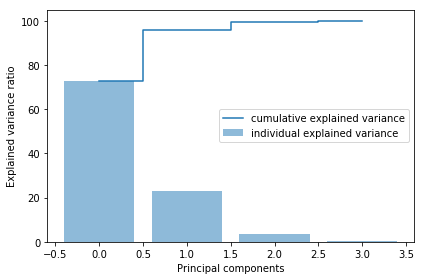

In [64]:
plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 选择两个最大的特征值对应的特征向量$[4\times2]$   

In [65]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


### 将样本点投影到选取的特征向量上
* $[150\times4]*[4\times2]=[150\times2]$   

In [68]:
Y = X_std.dot(matrix_w)
Y.shape

(150, 2)

### X为原数据$[150\times4]$， Y为降维后的数据$[150\times2]$，观察信息点情况

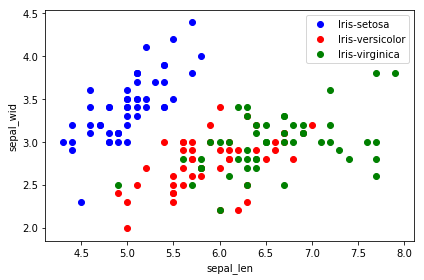

In [69]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(X[y==lab, 0],
                X[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

原数据的红色样本点与绿色样本点分界不明显

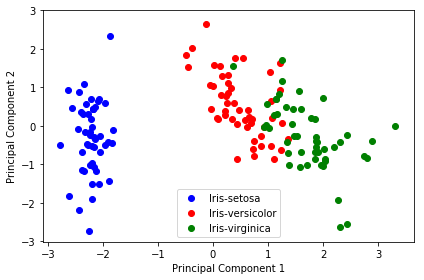

In [70]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

降维后数据的样本点分界明显改善